In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [25]:
pulsos = pd.read_csv("PulsosPorLitro4", delimiter=' ', header=None, names=['Pulsos', 'Litros'])
vec_litros = pulsos['Litros'].to_list()
vec_pulsos = pulsos['Pulsos'].to_list()
#pulsos.set_index('Pulsos', inplace=True)
pulsos

,Pulsos,Litros
0,1621,3832
1,1691,3990
2,1685,3983
3,1719,4064
4,1621,3832
5,1654,3910
6,1699,4017
7,1672,3953
8,1705,4031
9,1684,3091


In [26]:
media_pulsos = np.mean(vec_pulsos) 
desvioP = np.std(vec_pulsos)
erroRel = desvioP / media_pulsos

print(f"\nMedia dos Pulsos: {media_pulsos}")
print(f"\nErro relativo dos Pulsos: {erroRel}")


Media dos Pulsos: 1671.95

Erro relativo dos Pulsos: 0.01696284026769833


In [27]:
media_litros = np.mean(vec_litros)
desvioPad = np.std(vec_litros)
erroRel = desvioPad / media_litros

print(f"\nMedia dos Litros: {media_litros}")
print(f"\nErro relativo dos Litros: {erroRel}")

#Robert erro
valor_medido = vec_litros

error_medida = []
for i in range(len(vec_litros)):
    error_medida.append(vec_litros[i] - 3000)
erroMedida_Media = abs(np.mean(error_medida))
erro_porcentagem = (erroMedida_Media/3000)*100
print(f"Erro da medida: {erroMedida_Media} ----- > {erro_porcentagem}%")


Media dos Litros: 3907.75

Erro relativo dos Litros: 0.050889769131295566
Erro da medida: 907.75 ----- > 30.258333333333333%


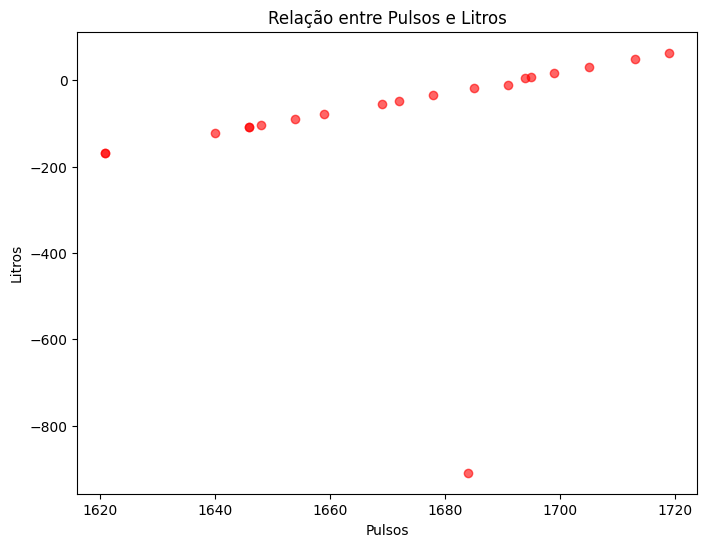

In [28]:
plt.figure(figsize=(8, 6))
relative_litros = []
for i in range(len(vec_litros)):
    relative_litros.append(vec_litros[i] - 4000)
plt.scatter(vec_pulsos, relative_litros, color='red', alpha=0.6)
plt.title('Relação entre Pulsos e Litros')
plt.xlabel('Pulsos')
plt.ylabel('Litros')
plt.show()


In [29]:
pulsos = pd.read_csv("PulsosPorLitro4", delimiter=' ', header=None, names=['Pulsos', 'Litros'])
vec_litros = pulsos['Litros'].to_list()
vec_pulsos = pulsos['Pulsos'].to_list()

In [30]:
media_pulsos = np.mean(vec_pulsos) 
desvioP = np.std(vec_pulsos)
erroRel = desvioP / media_pulsos

print(f"\nMedia dos Pulsos: {media_pulsos}")
print(f"\nErro relativo dos Pulsos: {erroRel}")


Media dos Pulsos: 1671.95

Erro relativo dos Pulsos: 0.01696284026769833


In [31]:
media_litros = np.mean(vec_litros)
desvioPad = np.std(vec_litros)
erroRel = desvioPad / media_litros

print(f"\nMedia dos Litros: {media_litros}")
print(f"\nErro relativo dos Litros: {erroRel}")

#Erro medida
valor_medido = vec_litros
erro_medida = []

for i in range(len(vec_litros)):
    erro_medida.append(vec_litros[i] - 4000)
erroMedidaMedia = abs(np.mean(erro_medida))
erro_porcentagem = (erroMedidaMedia/4000)*100
print(f"Erro da medida: {erroMedidaMedia} ----- > {erro_porcentagem}%")


Media dos Litros: 3907.75

Erro relativo dos Litros: 0.050889769131295566
Erro da medida: 92.25 ----- > 2.30625%
